In [1]:
import os
import glob
import subprocess
import numpy as np
import pandas as pd
import scipy

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
gtf = pd.read_csv('/node200data/18parkky/datasets/reference/transcriptome/GFF/gencode.v47.basic.annotation.labeled.gtf', sep='\t')
dict_TranscriptID_to_GeneName   = { tup.ENST : tup.gene_name for tup in gtf.itertuples() }
dict_TranscriptID_to_GeneID     = { tup.ENST : tup.ENSG for tup in gtf[gtf['feature']=='transcript'].itertuples() }

## Run Salmon (depr: no-need)

In [362]:
# PATH_sh = '/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/salmon_out/runSalmonQuant.sh'

# PATH_salmon_bin = '/node200data/18parkky/programs/salmon/salmon-latest_linux_x86_64/bin/salmon'
# DIR_salmon_index = '/node200data/18parkky/datasets/reference/z_program_references/salmon/hg38_index'
# list_DIR_FASTQ  = '/node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/MSI'
# DIR_salmon_out = '/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/salmon_out'
# num_threads = 32


# with open(PATH_sh, 'w') as sh:
#     for DIR_FASTQ in glob.glob(f'{list_DIR_FASTQ}/*'):
#         PatientID = DIR_FASTQ.split('/')[-1]

#         if os.path.isdir(DIR_FASTQ)==False or '_only' in DIR_FASTQ: continue 
#         if os.path.exists( f'{DIR_salmon_out}/{PatientID}' ) == True: continue 
        
#         PATH_R1_FASTQ = f'{DIR_FASTQ}/{PatientID}_R1.fastq.gz'
#         PATH_R2_FASTQ = f'{DIR_FASTQ}/{PatientID}_R2.fastq.gz'

#         cmd = f'{PATH_salmon_bin} quant -i {DIR_salmon_index} -l A -1 {PATH_R1_FASTQ} -2 {PATH_R2_FASTQ} -p {num_threads} -o {DIR_salmon_out}/{PatientID}'
#         print(cmd)
#         sh.write(f'{cmd}\n')


/node200data/18parkky/programs/salmon/salmon-latest_linux_x86_64/bin/salmon quant -i /node200data/18parkky/datasets/reference/z_program_references/salmon/hg38_index -l A -1 /node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/MSI/1236/1236_R1.fastq.gz -2 /node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/MSI/1236/1236_R2.fastq.gz -p 32 -o /node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/salmon_out/1236
/node200data/18parkky/programs/salmon/salmon-latest_linux_x86_64/bin/salmon quant -i /node200data/18parkky/datasets/reference/z_program_references/salmon/hg38_index -l A -1 /node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/MSI/1253/1253_R1.fastq.gz -2 /node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/MSI/1253/1253_R2.fastq.gz -p 32 -o /node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/salmon_out/1253
/node200data/18parkky/programs/salmon/salmon-latest_linux_x86_64/bin/salmon quant -i /node200data/18parkky

### Merge Salmon outputs

In [398]:
# list_salmons = list()
# for DIR_salmon in [ D for D in glob.glob('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/salmon_out/*') if os.path.isdir(D)==True ]:
#     PATH_salmon = f'{DIR_salmon}/quant.sf'
#     if os.path.exists(PATH_salmon) == False: continue 
    
#     PatientID = DIR_salmon.split('/')[-1]
#     print(PatientID, flush=True,)
    
#     salmon = pd.read_csv(PATH_salmon, sep='\t')
#     salmon['PatientID'] = PatientID
    
#     col_GeneID = list()
#     for ENST in salmon['Name']:
#         try:
#             col_GeneID.append(dict_TranscriptID_to_GeneID[ENST])
#         except KeyError:
#             col_GeneID.append( None )
#     salmon['GeneID'] = col_GeneID
    
#     salmonGeneLevel = list()
#     for GeneID, edf in salmon.dropna().groupby('GeneID'):
#         salmonGeneLevel.append( [GeneID, edf.iloc[0].PatientID, sum( edf['TPM'] )] )
#     salmonGeneLevel = pd.DataFrame(salmonGeneLevel, columns=['ENSMUSG', 'PatientID', 'TPM'])
    
#     list_salmons.append( salmonGeneLevel )
    
# salmons = pd.concat(list_salmons)

In [407]:
# salmons['ENSMUSG_2'] = [ ENSMUSG.split('.')[0] for ENSMUSG in salmons['ENSMUSG'] ]
# salmons_mtx = salmons.pivot(index='ENSMUSG_2', columns='PatientID', values='TPM')
# salmons_mtx.to_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/salmon_out/merged.csv', )

# g = [ ENSG.split('.')[0] for ENSG in gtf[(gtf['gene_name'].isin(['S100A6', 'S100P'])) & (gtf['feature']=='gene')]['ENSG'] ]

# salmons_mtx[salmons_mtx.index.isin(g)]

In [ ]:
# dict_ENST_to_ExpressionValues = dict()
# for ENST, edf in salmons.groupby('Name'):
#     if len(edf) != len(set(salmons['PatientID'])):
#         print(ENST)
#         break
    
#     temp = list()
#     for tup in edf.sort_values('PatientID').itertuples():
#         temp.append( tup.TPM )
#     dict_ENST_to_ExpressionValues[ ENST ] = temp

## Load Author-provided salmon output

In [3]:
SGBulk_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/Synapse-metadata/SG-BULK_patient_clinical_information.csv')
SGBulk_metadata_MSI = SGBulk_metadata[SGBulk_metadata['MSI.Status']=='MSI'].copy()
MSI_PatientID = list([ str(e) for e in SGBulk_metadata_MSI['patient_id'] ])

In [4]:
SalmonOut = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/Synapse-metadata/SG-BULK_salmonTPM.csv')
SalmonOut.rename( {'Unnamed: 0' : 'GeneID'}, axis=1, inplace=True )

In [5]:
dict_GeneID_to_GeneName = { tup.ENSG.split('.')[0] : tup.gene_name for tup in gtf.itertuples() }
for ENSG in SalmonOut['GeneID']:
    try: dict_GeneID_to_GeneName[ENSG]
    except KeyError: dict_GeneID_to_GeneName[ENSG] = None
    
SalmonOut['GeneName'] = [ dict_GeneID_to_GeneName[GID] for GID in SalmonOut['GeneID'] ]

In [6]:
# Filter out MSS patients
SalmonOut = SalmonOut[['GeneID', 'GeneName']+ MSI_PatientID ].copy()

## Load NanoMnT results

In [41]:
AlleleTable = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/AlleleTable.concat.tsv.gz', sep='\t')
AlleleTable.rename( {'read_STR_length' : 'read_STR_allele', 'patient_id' : 'PatientID'}, axis=1, inplace=True )
AlleleTable['diff'] = AlleleTable['read_STR_allele'] - AlleleTable['reference_STR_allele']
orig_length = len(AlleleTable)
orig_length

In [45]:
### 1. Filter out low-quality flankings (e.g., indels within flankings)        
col_flanking_quality = list()
for tup in AlleleTable.itertuples():
    bf = f'{tup.left_flanking_seq}{tup.right_flanking_seq}'
    if '*' in bf:
        col_flanking_quality.append( 'Poor' )
    elif bf.upper() != bf:
        col_flanking_quality.append( 'Poor' )
    else:
        col_flanking_quality.append( 'Good' )
        
AlleleTable['flanking_quality'] = col_flanking_quality
AlleleTable = AlleleTable[(AlleleTable['flanking_quality']=='Good')].copy()

### 2. Filter out G/C repeats
AlleleTable = AlleleTable[(AlleleTable['repeat_unit'].isin(['A', 'T']))].copy()
print(f'{round(100*len(AlleleTable)/orig_length, 2)} %')        

89.9 %


In [329]:
AlleleTable.to_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/AlleleTable.concat.processed.tsv.gz', sep='\t', index=False, compression='gzip')

In [7]:
AlleleTable = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/AlleleTable.concat.processed.tsv.gz', sep='\t')

In [8]:
AlleleTable_MSI = AlleleTable[AlleleTable['PatientID'].isin( set(SGBulk_metadata_MSI['patient_id']) )].copy()

## Summarize NanoMnT results by patient

In [9]:
STRProfileByPatient = list()

for PatientID, edf in AlleleTable_MSI.groupby('PatientID'):
    for reference_STR_allele, edf2 in edf.groupby('reference_STR_allele'):
        STRProfileByPatient.append( [str(PatientID), 
                                     reference_STR_allele, 
                                     np.mean(edf2['diff']),
                                     np.std(edf2['diff']), 
                                     len(edf2)] )
        
STRProfileByPatient = pd.DataFrame(STRProfileByPatient, columns=['PatientID', 'reference_STR_allele', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci'])
STRProfileByPatient = STRProfileByPatient[STRProfileByPatient['NumSTRLoci']>=1000].copy()

In [11]:
STRProfileByPatient_summary = list()

for PatientID, edf in AlleleTable_MSI.groupby('PatientID'):
    STRProfileByPatient_summary.append( [str(PatientID), 
                                    np.mean(edf['diff']),
                                    np.std(edf['diff']), 
                                    len(edf)] )
        
STRProfileByPatient_summary = pd.DataFrame(STRProfileByPatient_summary, columns=['PatientID', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci'])

In [13]:
STRProfileByPatient_summary['MSI_score'] = STRProfileByPatient_summary['AvgSTRDiff'] * STRProfileByPatient_summary['StdSTRDiff'] * -1
STRProfileByPatient_summary

,PatientID,AvgSTRDiff,StdSTRDiff,NumSTRLoci,MSI_score
0,490,-1.381072,2.003876,1343662,2.767497
1,612,-1.048048,1.890055,1860309,1.980868
2,649,-1.020476,1.897118,1123413,1.935964
3,698,-0.216449,1.373595,2326246,0.297313
4,786,-0.942700,1.862969,1454567,1.756221
5,814,-1.287179,2.036692,1451513,2.621587
6,1054,-1.359460,2.010035,914336,2.732562
7,1105,-1.207125,1.931027,1304848,2.330990
8,1236,-0.769209,1.641775,1203720,1.262868
9,1253,-1.143452,1.938192,1273723,2.216229


In [113]:
orders = list()
for reference_STR_allele in range(15, 24):
    STRProfileByPatient_oi = STRProfileByPatient[STRProfileByPatient['reference_STR_allele']==reference_STR_allele]

    PatientOrder = STRProfileByPatient_oi.groupby(["PatientID"])['AvgSTRDiff'].aggregate('median').reset_index().sort_values('AvgSTRDiff')['PatientID']
    orders.append(  list([int(e) for e in PatientOrder]) )

# sns.barplot(data=STRProfileByPatient_oi, y='PatientID', x='AvgSTRDiff', order=PatientOrder)

<Axes: >

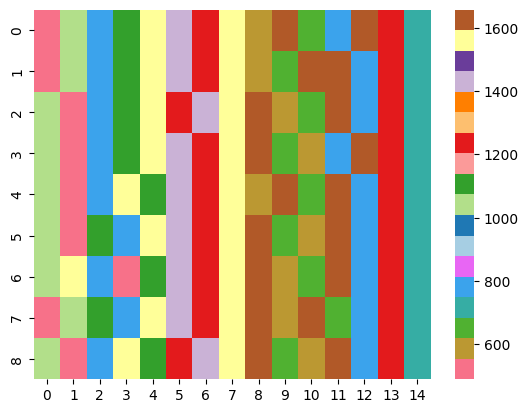

In [114]:
sns.heatmap(pd.DataFrame(orders), cmap=sns.color_palette('husl')+sns.color_palette('Paired'))

## Overlay tumor purity

In [14]:
TumorPurity = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/TumorPurity.tsv', sep='\t')
dict_PatientID_to_Purity = { str(tup.id) : float(tup.purity) for tup in TumorPurity.itertuples() }
STRProfileByPatient['TumorPurity'] = [ dict_PatientID_to_Purity[PID] for PID in STRProfileByPatient['PatientID'] ]
STRProfileByPatient_summary['TumorPurity'] = [ dict_PatientID_to_Purity[PID] for PID in STRProfileByPatient_summary['PatientID'] ]

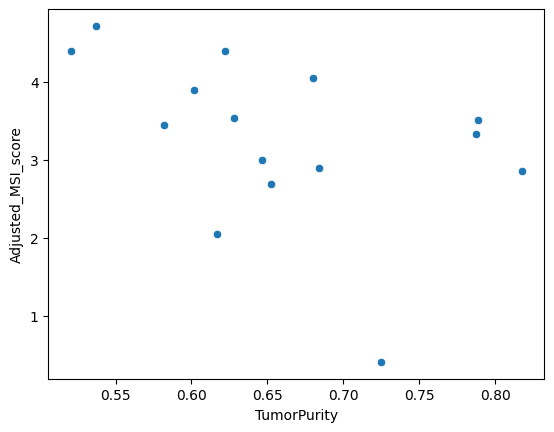

In [67]:
STRProfileByPatient_summary['Adjusted_MSI_score'] = STRProfileByPatient_summary['MSI_score'] / STRProfileByPatient_summary['TumorPurity']
sns.scatterplot(data=STRProfileByPatient_summary, x='TumorPurity', y='Adjusted_MSI_score')

dict_PatientID_to_AdjustedMSIscore = { tup.PatientID : tup.Adjusted_MSI_score  for tup in STRProfileByPatient_summary.itertuples() }

In [20]:
orders = STRProfileByPatient_summary.groupby(["PatientID"])['Adjusted_MSI_score'].aggregate(np.median).reset_index().sort_values('Adjusted_MSI_score')
orders

/tmp/ipykernel_144986/2818643993.py:1: FutureWarning: The provided callable <function median at 0x7f38503d9760> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  orders = STRProfileByPatient_summary.groupby(["PatientID"])['Adjusted_MSI_score'].aggregate(np.median).reset_index().sort_values('Adjusted_MSI_score')


,PatientID,Adjusted_MSI_score
12,698,0.410229
2,1236,2.047275
13,786,2.692035
1,1105,2.851091
10,612,2.896132
11,649,2.994871
14,814,3.328334
7,1627,3.446317
9,490,3.509805
3,1253,3.529668


## Validate various gene expression patterns

### Intersecting up

In [116]:
intersecting_up = list(pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis/DEGs/intersecting_up.txt', header=None)[0])
intersecting_dw = list(pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis/DEGs/intersecting_down.txt', header=None)[0])
fetal_signature = list(pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/Chen_et_al/wnt_stem_signature.txt', header=None)[0])
fetal_signature

['CLDN2',
 'CD44',
 'AXIN2',
 'RNF43',
 'TGFBI',
 'EPHB2',
 'TEAD2',
 'CDX2',
 'LGR5',
 'OLFM4',
 'ASCL2']

<Axes: xlabel='Adjusted_MSI_score', ylabel='Adjusted_MeanExpression'>

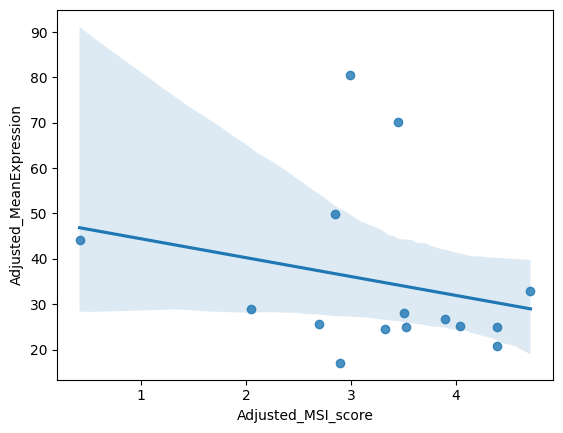

In [117]:
S100_family = [g for g in fetal_signature if g in list(SalmonOut['GeneName'])]

SalmonOut_oi = SalmonOut[(SalmonOut['GeneName'].isin(S100_family))][['GeneName'] + list(orders['PatientID'])].copy()
SalmonOut_oi= SalmonOut_oi.T
SalmonOut_oi.columns = SalmonOut_oi.iloc[0]
SalmonOut_oi.drop(labels='GeneName', axis=0, inplace=True)
SalmonOut_oi.index.name = None 
SalmonOut_oi['MeanExpression'] = [ np.mean(list(tup)[1:]) for tup in SalmonOut_oi.itertuples() ]
SalmonOut_oi.reset_index(inplace=True)
SalmonOut_oi.columns = ['PatientID'] + S100_family + ['MeanExpression']

SalmonOut_oi['Adjusted_MSI_score'] = [ dict_PatientID_to_AdjustedMSIscore[PID] for PID in SalmonOut_oi['PatientID'] ]
SalmonOut_oi['Adjusted_MeanExpression'] = [ tup.MeanExpression * dict_PatientID_to_Purity[tup.PatientID] for tup in SalmonOut_oi.itertuples() ]

SalmonOut_oi['TumorPurity'] = [  dict_PatientID_to_Purity[PID] for PID in SalmonOut_oi['PatientID'] ]

sns.regplot(data=SalmonOut_oi, x='Adjusted_MSI_score', y='Adjusted_MeanExpression')

In [110]:
scipy.stats.pearsonr( SalmonOut_oi['Adjusted_MSI_score'], SalmonOut_oi['MeanExpression'] )

PearsonRResult(statistic=-0.37478135392347045, pvalue=0.16870100160735746)

In [41]:
tup

Pandas(Index='S100A11', _1=138.688475, _2=237.501402, _3=168.118899, _4=130.942038, _5=177.628056, _6=177.369808, _7=268.126623, _8=200.945572, _9=119.345163, _10=125.126673, _11=184.038903, _12=218.057981, _13=116.975734, _14=206.10249, _15=170.735839)

## Immune signature

In [177]:
smillie_immune_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/Smillie_et_al/colon_marker.csv',)

monocyte_markers = smillie_immune_marker[(smillie_immune_marker['ident']=='E.Epithelial')]['gene']
monocyte_markers = smillie_immune_marker[(smillie_immune_marker['ident']=='T.CD8')]['gene']
monocyte_markers = smillie_immune_marker[(smillie_immune_marker['ident']=='Macrophages')]['gene']
# monocyte_markers = ['CEACAM5', 'TFF3', 'OLFM4']

monocyte_markers = [ 'C1QA', 'C1QB', 'C1QC' ]
monocyte_markers = [ 'CD8A', 'CD3D', 'CD3E', 'CD4' ]

<Axes: xlabel='TumorPurity', ylabel='AvgSTRDiff'>

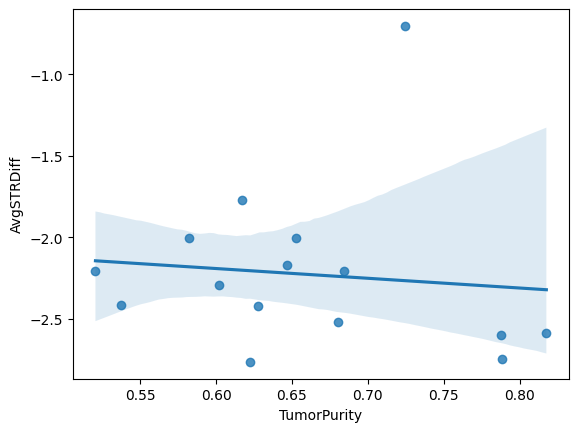

In [162]:
sns.regplot(data=STRProfileByPatient[(STRProfileByPatient['reference_STR_allele']==17)], x='TumorPurity', y='AvgSTRDiff')

In [169]:
dict_PatientID_to_MSIintensity = { PatientID : np.mean(edf['AvgSTRDiff']) for PatientID, edf in STRProfileByPatient.groupby('PatientID') }
dict_PatientID_to_MSIintensity

{'1054': -3.533972651060166,
 '1105': -3.556993043253012,
 '1236': -2.5023483062650285,
 '1253': -3.4663305690460375,
 '1424': -3.6483602899130423,
 '1528': -4.089011402617736,
 '1556': -3.481744225393198,
 '1627': -3.2270207389545456,
 '1657': -3.6214802150456555,
 '490': -3.7215168423057157,
 '612': -3.302346400481588,
 '649': -3.1281330610875515,
 '698': -1.5586846389571793,
 '786': -3.091841019504046,
 '814': -3.8643032334022474}

-0.023120287031153222 0.9348167801619693


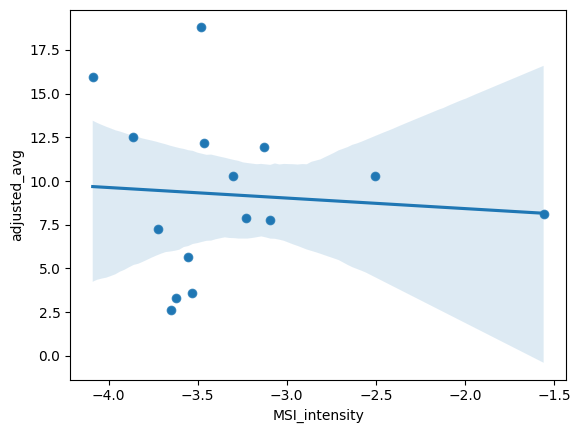

In [178]:
SalmonOut_oi = SalmonOut[SalmonOut['GeneName'].isin(monocyte_markers)][list(SalmonOut.columns)[1:]].copy()
SalmonOut_oi.reset_index(inplace=True, drop=True)
SalmonOut_oi.index = [ str(e) for e in SalmonOut_oi['GeneName'] ]
SalmonOut_oi = SalmonOut_oi[list(SalmonOut_oi.columns)[1:]]
SalmonOut_oi = SalmonOut_oi.T
SalmonOut_oi['avg'] = [ np.mean(list(tup)[1:]) for tup in SalmonOut_oi.itertuples() ]
SalmonOut_oi['purity'] = [ dict_PatientID_to_Purity[tup.Index] for tup in SalmonOut_oi.itertuples() ]
SalmonOut_oi['adjusted_avg'] = [ tup.avg/(1-tup.purity) for tup in SalmonOut_oi.itertuples() ]  #! Fixed
SalmonOut_oi = SalmonOut_oi[(SalmonOut_oi.index.isin(list(dict_PatientID_to_MSIintensity.keys())))]
SalmonOut_oi['MSI_intensity'] = [ dict_PatientID_to_MSIintensity[PatientID] for PatientID in SalmonOut_oi.index ]

SalmonOut_oi.index.name = 'PatientID'
SalmonOut_oi = SalmonOut_oi.reindex([str(e) for e in orders['PatientID']])
# sns.scatterplot(data=SalmonOut_oi, y='PatientID', x='avg', )
sns.scatterplot(data=SalmonOut_oi, x='MSI_intensity', y='adjusted_avg', )
sns.regplot(data=SalmonOut_oi, x='MSI_intensity', y='adjusted_avg', )

r, pval = scipy.stats.pearsonr( SalmonOut_oi['MSI_intensity'], SalmonOut_oi['avg'] )
print(r, pval)

0.6139541962210393 0.014903171988446998


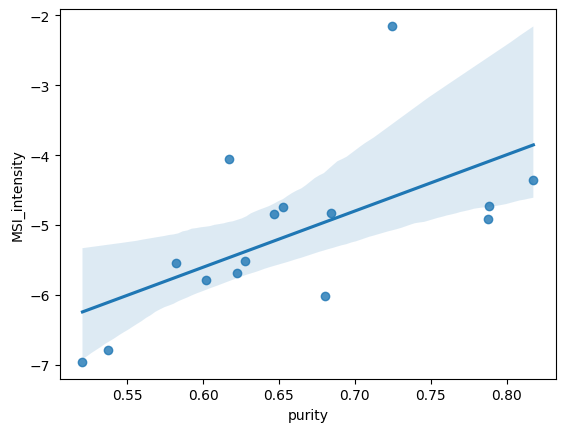

In [148]:
# sns.scatterplot(data=SalmonOut_oi, x='purity', y='adjusted_avg', hue='PatientID', legend=None)
sns.regplot(data=SalmonOut_oi, x='purity', y='MSI_intensity', )
r, pval = scipy.stats.pearsonr( SalmonOut_oi['MSI_intensity'], SalmonOut_oi['purity'] )
print(r, pval)

## Run PUREE (depr: no-need)

In [130]:
# input for PUREE
SalmonOut_temp = SalmonOut.copy()
SalmonOut_temp.index = SalmonOut_temp.pop('GeneID')
SalmonOut_temp.pop('GeneName')
SalmonOut_temp.to_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/PUREE/GeneExpression.MSI.csv')

In [133]:
SalmonOut_temp.columns

Index(['47', '95', '106', '326', '363', '420', '470', '490', '584', '609',
       '612', '649', '665', '698', '742', '786', '814', '858', '958', '1054',
       '1105', '1151', '1165', '1177', '1236', '1253', '1298', '1424', '1528',
       '1556', '1627', '1657', '1672'],
      dtype='object')

In [136]:
PUREE_out = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/PUREE/PUREE_out.tsv', sep='\t')
PUREE_out['PatientID'] = SalmonOut_temp.columns
dict_PatientID_to_Purity = { tup.PatientID : tup.purity for tup in PUREE_out.itertuples() }

In [410]:
dict_PatientID_to_Purity

{'47': 0.7252808492185182,
 '95': 0.7326835241335153,
 '106': 0.7339893547884763,
 '326': 0.4952983104592613,
 '363': 0.6871581000346196,
 '420': 0.6972151847230712,
 '470': 0.6226775221060317,
 '490': 0.7250865819108182,
 '584': 0.4730726037194334,
 '609': 0.755603951802285,
 '612': 0.6423505622123117,
 '649': 0.6056779106937101,
 '665': 0.6397722720214783,
 '698': 0.768824113437989,
 '742': 0.5804289945155692,
 '786': 0.6620601981967847,
 '814': 0.6740047436769863,
 '858': 0.6816232514732977,
 '958': 0.8048515310176665,
 '1054': 0.7399145498167222,
 '1105': 0.74271955890948,
 '1151': 0.6051670334238497,
 '1165': 0.7427432462808292,
 '1177': 0.7188655364049972,
 '1236': 0.6414232126633197,
 '1253': 0.6610839476598758,
 '1298': 0.5943243128895225,
 '1424': 0.669953514927163,
 '1528': 0.6377434517419194,
 '1556': 0.5952232635363951,
 '1627': 0.4661932880742275,
 '1657': 0.569172678337741,
 '1672': 0.435181860114229}

In [411]:
PUREE_out2 = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/PUREE/PUREE_out.Manual.tsv', sep='\t')
PUREE_out2['PatientID'] = salmons_mtx.columns
dict_PatientID_to_Purity2 = { tup.PatientID : tup.purity for tup in PUREE_out2.itertuples() }

<Axes: xlabel='x', ylabel='y'>

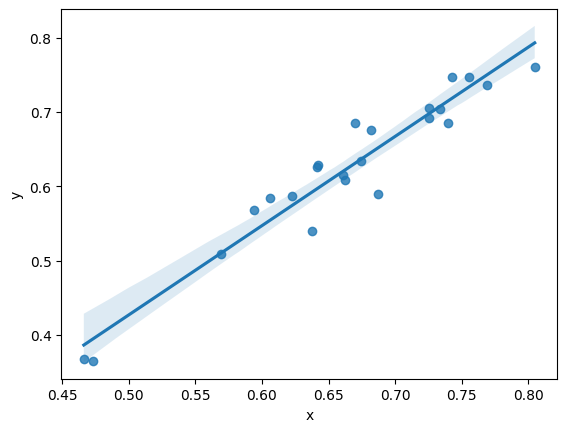

In [418]:
ComparePUREE = list()
for PatientID in salmons_mtx.columns:
    ComparePUREE.append( [PatientID, dict_PatientID_to_Purity[PatientID], dict_PatientID_to_Purity2[PatientID]] )
ComparePUREE = pd.DataFrame(ComparePUREE, columns=['PatientID', 'x', 'y'])
sns.regplot(data=ComparePUREE, x='x', y='y')